In [1]:
import numpy as np
import pandas as pd 

In [8]:
df = pd.read_excel("./data_wangchanBERTa.xlsx")

In [9]:
df.drop(columns=["Create_at"],inplace=True)

In [11]:
df['label']

0       0
1       0
2       1
3       0
4       0
       ..
4453    0
4454    2
4455    0
4456    1
4457    0
Name: label, Length: 4458, dtype: int64

In [12]:
df.label.value_counts()

0    2335
2    1420
1     703
Name: label, dtype: int64

In [15]:
topics_counts = (df.groupby(['Topics'])['label']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('label'))

In [16]:
topics_counts

,Topics,label,percentage
0,Company,0,47.476636
3,Logistics,0,70.829616
6,Promotion,0,47.272727
9,Store,0,42.266073
12,System,0,53.833866
2,Company,1,19.065421
5,Logistics,1,12.934880
8,Promotion,1,13.388430
11,Store,1,18.141311
14,System,1,14.376997


In [17]:
plotdata = pd.DataFrame({
    "Company":[47.5,19.1,33.4],
    "Logistics":[70.8,12.9,16.2],
    "Promotion":[47.3,18.1,39.3],
    "Store":[42.3,18.1,39.6],
    "System":[53.8,14.4,31.8]
    }, index=["Negative", "Positive", "Neutral"]
)
plotdata.head()

,Company,Logistics,Promotion,Store,System
Negative,47.5,70.8,47.3,42.3,53.8
Positive,19.1,12.9,18.1,18.1,14.4
Neutral,33.4,16.2,39.3,39.6,31.8


In [18]:
topics_counts = plotdata.apply(lambda x: x*100/sum(x), axis=1)

In [19]:
# Set the figure size - handy for larger output
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10, 5]

import matplotlib
matplotlib.style.use('default')

Text(0, 0.5, '')

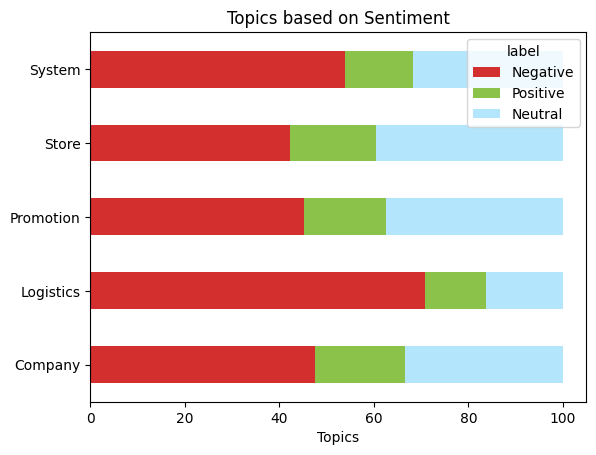

In [21]:
plotdata.transpose().apply(lambda x: x*100/sum(x), axis=1).plot(kind="barh", stacked=True,legend=False,color =['#D32F2F','#8BC34A','#B3E5FC']
    ).legend(loc='upper right', ncol=1, title="label")
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Topics based on Sentiment")
plt.xlabel("Topics")
plt.ylabel("")